In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import platform

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [3]:
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Monthly

In [4]:
if platform.system() == 'Windows':
  pm10_monthly = pd.read_csv("..\\Data for model\\o3_meteorolgical_monthly.csv")
elif platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/gdrive')
  pm10_monthly = pd.read_csv("/content/gdrive/Othercomputers/My Laptop (1)/jkt-aqi-forecasting/Model/Data for Model/o3_meteorolgical_monthly.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## O<sub>3</sub>

In [5]:
o3_monthly

,tanggal,o3(ug/m3),o3_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
0,2010-01-31,51.0,22,27.4,80.2,14.4,2.5
1,2010-02-28,97.1,41,28.2,80.3,9.6,2.6
2,2010-03-31,101.1,42,28.6,78.5,9.4,2.6
3,2010-04-30,118.3,49,29.6,74.5,2.2,2.7
4,2010-05-31,124.3,52,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...,...
115,2019-08-31,143.1,60,28.3,68.8,0.0,1.4
116,2019-09-30,140.4,59,28.8,68.9,0.0,1.2
117,2019-10-31,159.5,67,29.5,70.0,0.0,1.2
118,2019-11-30,162.7,69,29.5,70.8,2.0,1.3


In [6]:
o3_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tanggal                         120 non-null    object 
 1   o3(ug/m3)                       120 non-null    float64
 2   o3_ispu                         120 non-null    int64  
 3   temperatur_rata-rata(°C)        120 non-null    float64
 4   kelembapan_rata-rata(%)         120 non-null    float64
 5   curah_hujan(mm)                 120 non-null    float64
 6   kecepatan_angin_rata-rata(m/s)  120 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.7+ KB


In [7]:
o3_monthly['tanggal'] = pd.to_datetime(o3_monthly['tanggal'], dayfirst=True)
o3_monthly.set_index('tanggal', inplace=True)

In [8]:
o3_monthly.describe()

,o3(ug/m3),o3_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,123.872500,52.133333,28.484167,75.831667,5.907500,1.881667
std,40.796987,17.162071,0.658365,4.315148,5.617263,0.680457
min,31.100000,14.000000,26.600000,66.300000,0.000000,0.900000
25%,95.125000,40.000000,28.175000,72.750000,1.800000,1.300000
50%,126.200000,52.500000,28.600000,76.300000,5.050000,1.600000
75%,156.550000,66.000000,28.900000,78.600000,8.525000,2.600000
max,203.900000,86.000000,29.900000,84.800000,33.000000,3.300000


In [9]:
o3_monthly.corr(method='spearman')

,o3(ug/m3),o3_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
o3(ug/m3),1.000000,0.999715,0.314346,-0.331460,-0.274015,0.319836
o3_ispu,0.999715,1.000000,0.314866,-0.331565,-0.275958,0.316290
temperatur_rata-rata(°C),0.314346,0.314866,1.000000,-0.674751,-0.598617,-0.110798
kelembapan_rata-rata(%),-0.331460,-0.331565,-0.674751,1.000000,0.845926,0.006361
curah_hujan(mm),-0.274015,-0.275958,-0.598617,0.845926,1.000000,0.087252
kecepatan_angin_rata-rata(m/s),0.319836,0.316290,-0.110798,0.006361,0.087252,1.000000


### Visualize

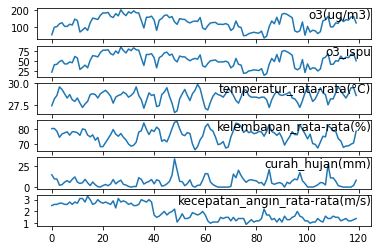

In [10]:
groups = [0, 1, 2, 3, 4, 5]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(o3_monthly.values[:, group])
    plt.title(o3_monthly.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Sliding Window

In [11]:
def series_to_supervised(index, data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.index = index
    if dropnan:
        agg.dropna(inplace=True)
    return agg

values = o3_monthly.values
reframed = series_to_supervised(o3_monthly.index, values, 3, 1)
reframed = reframed.iloc[:, :-5]
reframed

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,
2010-04-30,51.0,22.0,27.4,80.2,14.4,2.5,97.1,41.0,28.2,80.3,9.6,2.6,101.1,42.0,28.6,78.5,9.4,2.6,118.3
2010-05-31,97.1,41.0,28.2,80.3,9.6,2.6,101.1,42.0,28.6,78.5,9.4,2.6,118.3,49.0,29.6,74.5,2.2,2.7,124.3
2010-06-30,101.1,42.0,28.6,78.5,9.4,2.6,118.3,49.0,29.6,74.5,2.2,2.7,124.3,52.0,29.3,76.7,2.8,2.7,102.4
2010-07-31,118.3,49.0,29.6,74.5,2.2,2.7,124.3,52.0,29.3,76.7,2.8,2.7,102.4,43.0,28.8,77.4,5.8,2.6,102.3
2010-08-31,124.3,52.0,29.3,76.7,2.8,2.7,102.4,43.0,28.8,77.4,5.8,2.6,102.3,43.0,28.3,78.1,7.6,2.6,115.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,120.6,50.0,29.6,73.6,1.7,1.5,149.9,63.0,29.2,72.1,0.8,1.2,131.7,55.0,28.7,67.9,0.0,1.3,143.1
2019-09-30,149.9,63.0,29.2,72.1,0.8,1.2,131.7,55.0,28.7,67.9,0.0,1.3,143.1,60.0,28.3,68.8,0.0,1.4,140.4
2019-10-31,131.7,55.0,28.7,67.9,0.0,1.3,143.1,60.0,28.3,68.8,0.0,1.4,140.4,59.0,28.8,68.9,0.0,1.2,159.5


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
reframed = pd.DataFrame(scaler.fit_transform(reframed), index=reframed.index, columns=reframed.columns)
reframed

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,
2010-04-30,0.115162,0.111111,0.242424,0.751351,0.436364,0.666667,0.381944,0.375000,0.484848,0.756757,0.290909,0.708333,0.405093,0.388889,0.606061,0.659459,0.284848,0.708333,0.504630
2010-05-31,0.381944,0.375000,0.484848,0.756757,0.290909,0.708333,0.405093,0.388889,0.606061,0.659459,0.284848,0.708333,0.504630,0.486111,0.909091,0.443243,0.066667,0.750000,0.539352
2010-06-30,0.405093,0.388889,0.606061,0.659459,0.284848,0.708333,0.504630,0.486111,0.909091,0.443243,0.066667,0.750000,0.539352,0.527778,0.818182,0.562162,0.084848,0.750000,0.412616
2010-07-31,0.504630,0.486111,0.909091,0.443243,0.066667,0.750000,0.539352,0.527778,0.818182,0.562162,0.084848,0.750000,0.412616,0.402778,0.666667,0.600000,0.175758,0.708333,0.412037
2010-08-31,0.539352,0.527778,0.818182,0.562162,0.084848,0.750000,0.412616,0.402778,0.666667,0.600000,0.175758,0.708333,0.412037,0.402778,0.515152,0.637838,0.230303,0.708333,0.488426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.517940,0.500000,0.909091,0.394595,0.051515,0.250000,0.687500,0.680556,0.787879,0.313514,0.024242,0.125000,0.582176,0.569444,0.636364,0.086486,0.000000,0.166667,0.648148
2019-09-30,0.687500,0.680556,0.787879,0.313514,0.024242,0.125000,0.582176,0.569444,0.636364,0.086486,0.000000,0.166667,0.648148,0.638889,0.515152,0.135135,0.000000,0.208333,0.632523
2019-10-31,0.582176,0.569444,0.636364,0.086486,0.000000,0.166667,0.648148,0.638889,0.515152,0.135135,0.000000,0.208333,0.632523,0.625000,0.666667,0.140541,0.000000,0.125000,0.743056


In [13]:
from datetime import datetime

train_end = datetime.strptime('2011-12-31', '%Y-%m-%d')
test_start = datetime.strptime('2012-01-01', '%Y-%m-%d')
test_end = datetime.strptime('2019-12-31', '%Y-%m-%d')

train = reframed.loc[:train_end].values
test = reframed.loc[test_start:test_end].values
train_X, train_y = train[:, :-1], train[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21, 18) (21, 1) (96, 18) (96, 1)


In [14]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from sklearn.svm import SVR
import keras_tuner as kt

def call_existing_code(kernel, degree, gamma, coef0, tol, C, epsilon, shrinking):
    model = SVR(
        kernel=kernel,
        degree=degree, # poly
        gamma=gamma, # rbf, poly
        coef0=coef0, # poly
        tol=tol,
        C=C,
        epsilon=epsilon,
        shrinking=shrinking
    )
    return model

def build_model(hp):
    kernel = hp.Choice("kernel", ["poly", "rbf", "linear"], default="rbf")
    degree = hp.Int("degree", min_value=1, max_value=10, step=1, default=3)
    gamma = hp.Choice("gamma", ["scale", "auto"], default="scale")
    # gamma = hp.Choice("gamma", [1.0, 0.1, 0.01, 0.001, 0.0001])
    coef0 = hp.Float("coef0", min_value=0.0, max_value=1.0, step=0.1, default=0.0)
    tol = hp.Float("tol", min_value=1e-4, max_value=1e-2, default=1e-3)
    C = hp.Choice("C", [0.1, 1.0, 10.0, 100.0, 1000.0], default=1.0)
    epsilon = hp.Float("epsilon", min_value=1e-3, max_value=1.0, default=1e-1)
    shrinking = hp.Boolean("shrinking", default=True)
    model = call_existing_code(
        kernel=kernel,
        degree=degree,
        gamma=gamma,
        coef0=coef0,
        tol=tol,
        C=C,
        epsilon=epsilon,
        shrinking=shrinking
    )
    return model

build_model(kt.HyperParameters())

SVR()

In [16]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

if platform.system() == 'Windows':
  tuner = kt.tuners.SklearnTuner(
      oracle=kt.oracles.BayesianOptimizationOracle(
          objective=kt.Objective('score', 'max'),
          max_trials=100
      ),
    hypermodel=build_model,
    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    cv=TimeSeriesSplit(),
    overwrite=False,
    directory="D:\\From External Drive\\Kuliah\\Tugas Akhir\\undergraduate-thesis_2.0\\data-and-model\\Model",
    project_name="svr_o3_monthly_80-20_result"
  )
elif platform.system() == 'Linux':
  tuner = kt.tuners.SklearnTuner(
      oracle=kt.oracles.BayesianOptimizationOracle(
          objective=kt.Objective('score', 'max'),
          max_trials=100
      ),
    hypermodel=build_model,
    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    cv=TimeSeriesSplit(),
    overwrite=False,
    directory="/content/drive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model",
    project_name="svr_o3_monthly_80-20_result"
    )

tuner.search(train_X, train_y)

In [17]:
tuner.results_summary(num_trials=100)

Results summary
Results in /content/drive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model/svr_o3_monthly_80-20_result
Showing 100 best trials
Trial summary
Hyperparameters:
kernel: linear
degree: 5
gamma: scale
coef0: 0.30000000000000004
tol: 0.0006266295958271196
C: 1.0
epsilon: 0.09061434370161621
shrinking: False
Score: -0.1602117274729583
Trial summary
Hyperparameters:
kernel: linear
degree: 7
gamma: scale
coef0: 0.5
tol: 0.007089657603069828
C: 1.0
epsilon: 0.019181529364727463
shrinking: False
Score: -0.16090150564809622
Trial summary
Hyperparameters:
kernel: linear
degree: 8
gamma: auto
coef0: 0.7000000000000001
tol: 0.004649719493227994
C: 0.1
epsilon: 0.001
shrinking: False
Score: -0.164937137708894
Trial summary
Hyperparameters:
kernel: linear
degree: 3
gamma: scale
coef0: 0.30000000000000004
tol: 0.004396258056206524
C: 0.1
epsilon: 0.001
shrinking: False
Score: -0.16495717161379553
Trial summary
Hyperparameters:
kernel: linear
degree: 10
gamma: au

In [18]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

SVR(coef0=0.30000000000000004, degree=5, epsilon=0.09061434370161621,
    kernel='linear', shrinking=False, tol=0.0006266295958271196)

In [19]:
import numpy as np

best_hps = tuner.get_best_hyperparameters(10)
model = build_model(best_hps[0])
model.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(coef0=0.30000000000000004, degree=5, epsilon=0.09061434370161621,
    kernel='linear', shrinking=False, tol=0.0006266295958271196)

In [20]:
train_y = train_y.reshape((len(train_y), 1))
inv_y = np.concatenate((train_y, train_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

pred = model.predict(train_X)
pred = pred.reshape((len(pred), 1))
inv_yhat = np.concatenate((pred, train_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

train_result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[:train_end].index)

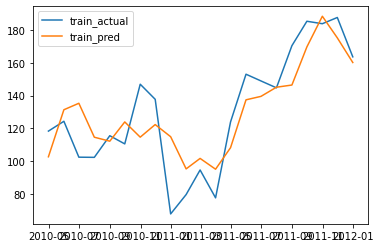

In [21]:
plt.plot(train_result['actual'], label='train_actual')
plt.plot(train_result['pred'], label='train_pred')
plt.legend()
plt.show()

In [22]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [23]:
from sklearn.metrics import r2_score

rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Train R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Train RMSE: {rmse:.3f}')
print(f'Train MAPE: {mape(inv_y, inv_yhat):.3f}%')

Train R-Squared: 71.763%
Train RMSE: 18.773
Train MAPE: 13.975%


In [24]:
rmse_each_month = []
for index, value in train_result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
train_result['rmse'] = rmse_each_month

In [25]:
mape_each_month = []
for index, value in train_result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
train_result['mape'] = mape_each_month

In [26]:
train_result

,actual,pred,rmse,mape
tanggal,,,,
2010-04-30,118.3,102.644469,15.66,13.23%
2010-05-31,124.3,131.332317,7.03,5.66%
2010-06-30,102.4,135.282175,32.88,32.11%
2010-07-31,102.3,114.579990,12.28,12.0%
2010-08-31,115.5,112.156082,3.34,2.9%
2010-09-30,110.5,123.901622,13.40,12.13%
2010-10-31,146.9,114.608930,32.29,21.98%
2010-11-30,137.7,122.296258,15.40,11.19%
2010-12-31,67.8,114.872473,47.07,69.43%


In [27]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

pred = model.predict(test_X)
pred = pred.reshape((len(pred), 1))
inv_yhat = np.concatenate((pred, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[test_start:test_end].index)

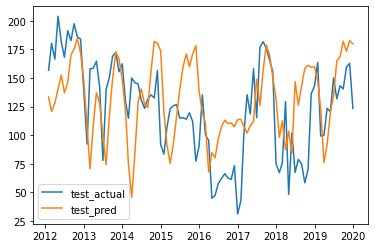

In [28]:
plt.plot(test_result['actual'], label='test_actual')
plt.plot(test_result['pred'], label='test_pred')
plt.legend()
plt.show()

In [29]:
rmse_each_month = []
for index, value in test_result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
test_result['rmse'] = rmse_each_month

In [30]:
mape_each_month = []
for index, value in test_result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
test_result['mape'] = mape_each_month

In [31]:
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Test R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAPE: {mape(inv_y, inv_yhat):.3f}%')

Test R-Squared: -6.749%
Test RMSE: 42.757
Test MAPE: 38.187%


In [32]:
test_result

,actual,pred,rmse,mape
tanggal,,,,
2012-01-31,156.7,133.434739,23.27,14.85%
2012-02-29,180.3,120.671186,59.63,33.07%
2012-03-31,166.4,127.941050,38.46,23.11%
2012-04-30,203.9,140.203440,63.70,31.24%
2012-05-31,181.5,152.522023,28.98,15.97%
...,...,...,...,...
2019-08-31,143.1,168.661411,25.56,17.86%
2019-09-30,140.4,181.954435,41.55,29.6%
2019-10-31,159.5,173.270042,13.77,8.63%
